In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_excel('D:/8th sem/Thermal lab/moddata.xlsx')
df.head()

,Mass rate,T,W,hao,Pao
0,7.55,307.8,0.021,338.768360,1.453960
1,6.36,306.9,0.018,335.419116,1.344164
2,8.67,308.2,0.022,343.885040,1.520502
3,12.22,307.9,0.021,351.496540,1.643607
4,15.65,306.7,0.019,353.021473,1.733439


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
print(scaler.fit(df[['hao']]))

MinMaxScaler()


In [35]:
x = df[['Mass rate','W']]
x = scale(x)
print(x)

[[-0.56326038  0.76429209]
 [-0.98724419 -0.56316259]
 [-0.1642168   1.20677698]
 [ 1.10060884  0.76429209]
 [ 2.32267982 -0.1206777 ]
 [ 1.18255529  0.76429209]
 [-0.56326038  1.20677698]
 [-0.59888927 -0.1206777 ]
 [-0.60601505 -0.56316259]
 [-0.59888927 -1.44813238]
 [-0.5240686  -1.89061727]]


In [36]:
print(scaler.data_max_)

[361.8522699]


In [37]:
print(scaler.transform(df[['hao']]))

[[0.12670616]
 [0.        ]
 [0.32027673]
 [0.6082295 ]
 [0.66591967]
 [1.        ]
 [0.12498838]
 [0.11643211]
 [0.03709428]
 [0.11071815]
 [0.12498838]]


In [38]:
y=scaler.transform(df[['hao']])
print(y)

[[0.12670616]
 [0.        ]
 [0.32027673]
 [0.6082295 ]
 [0.66591967]
 [1.        ]
 [0.12498838]
 [0.11643211]
 [0.03709428]
 [0.11071815]
 [0.12498838]]


In [39]:
sgdr = SGDRegressor()
sgdr.fit(x, y)

score = sgdr.score(x, y)
print("R-squared:", score)


R-squared: 0.5422619887323616


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
ypred = sgdr.predict(x)
ypred = ypred.reshape(-1,1)
print(ypred)

[[ 1.30629616e-01]
 [-9.35288355e-03]
 [ 2.16885982e-01]
 [ 3.86267133e-01]
 [ 5.24132286e-01]
 [ 3.98857418e-01]
 [ 1.55576770e-01]
 [ 7.52612713e-02]
 [ 4.92193099e-02]
 [ 4.19809111e-04]
 [-1.30318677e-02]]


In [41]:
opt = pd.DataFrame(scaler.inverse_transform(ypred))
print(opt.to_string(index=False))

         0
338.872069
335.171890
341.152097
345.629375
349.273586
345.962176
339.531501
337.408509
336.720138
335.430213
335.074643


In [42]:
mse = mean_squared_error(y, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  0.04322989915694813
RMSE:  0.20791801066032767


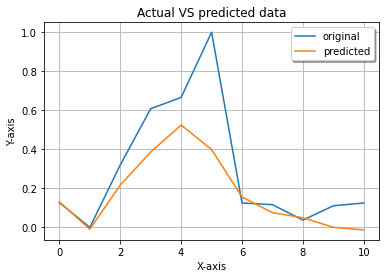

In [43]:
x_ax = range(len(y))
plt.plot(x_ax, y, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Actual VS predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()